# **Automatidata project: EDA Analysis**

## TASK

The purpose of this project is to conduct exploratory data analysis on a provided data set, cleaning of dataset and create relevant vizualizations.

**Note**: The notebook consists of two parts: Data Exploration and Visualization

1. Data Exploration
2. Data Visualization
- 2.1. Outlier detection
- 2.2. Tips Amount Investigation
- 2.3. Number of Rides
- 2.4. Total Earned Amount

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

### 1. Data Exploration



In [3]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
def df_analyze(dataset):
    """
    Function is utilized to get basic descriptive stats from dataframes.
    """
    print("1. THE SHAPE OF DATASET")
    print("-------------------------")
    print(f"Number of rows: {dataset.shape[0]} \nNumber of features: {dataset.shape[1]}")
    print('\n')
    print("2. MISSING AND DUPLICATED VALUES")
    print("-------------------------")    
    for col in df.columns:
        if dataset.isna().any().sum()==0:
            print(f"Data set doesn't contain any missing value")
            break
        elif dataset[col].isna().sum()>0:
            print(f"Number of nulls in {col} column is {dataset[col].isna().sum()}")
    print(f"Data set has {dataset.duplicated().sum()} duplication.")
    print('\n')
    print("3. DATA TYPES")
    print("-------------------------")
    print(dataset.dtypes)
    print('\n')
    print("4. SUMMARY STATISTICS")
    print("-------------------------")
    display(df.describe())

In [5]:
df_analyze(df)

1. THE SHAPE OF DATASET
-------------------------
Number of rows: 22699 
Number of features: 18


2. MISSING AND DUPLICATED VALUES
-------------------------
Data set doesn't contain any missing value
Data set has 0 duplication.


3. DATA TYPES
-------------------------
Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object


4. SUMMARY STATISTICS
-------------------------


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [6]:
# Changing data type of pickup and drop-off columns to datetime

df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [7]:
print(f" Number of null values: {df.isna().any().sum()} \n Number of duplicated records: {df.duplicated().sum()}")

 Number of null values: 0 
 Number of duplicated records: 0


**Important Notes:** 

- Data set contains 22699 records and 18 features.
- There are no any missing or duplicated records.
- Majority of datas are numerical (int64 and float64)

### 2. Data Visualization

**2.1. Outlier Detection**

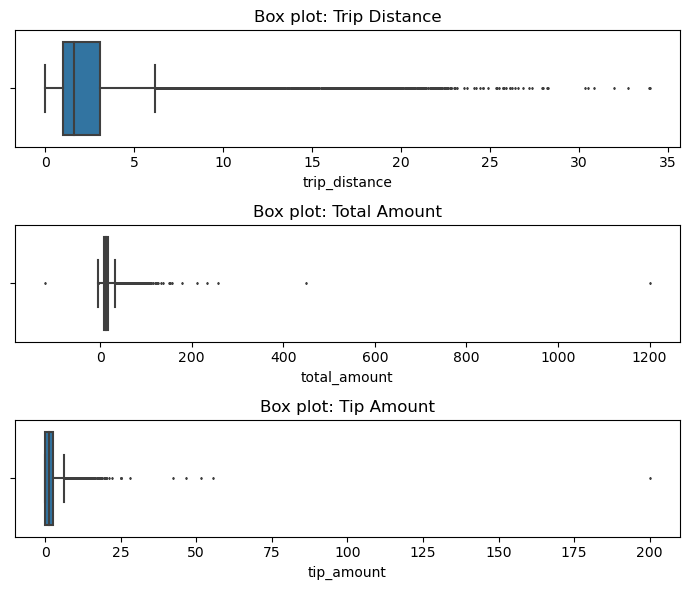

In [8]:
fig,axes=plt.subplots(3,1, figsize=(7,6))
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1, ax=axes[0]);
sns.boxplot(x=df['total_amount'], fliersize=1, ax=axes[1])
sns.boxplot(x=df['tip_amount'], fliersize=1, ax=axes[2])
axes[0].set_title('Box plot: Trip Distance')
axes[1].set_title('Box plot: Total Amount')
axes[2].set_title('Box plot: Tip Amount')
fig.tight_layout()
plt.show()

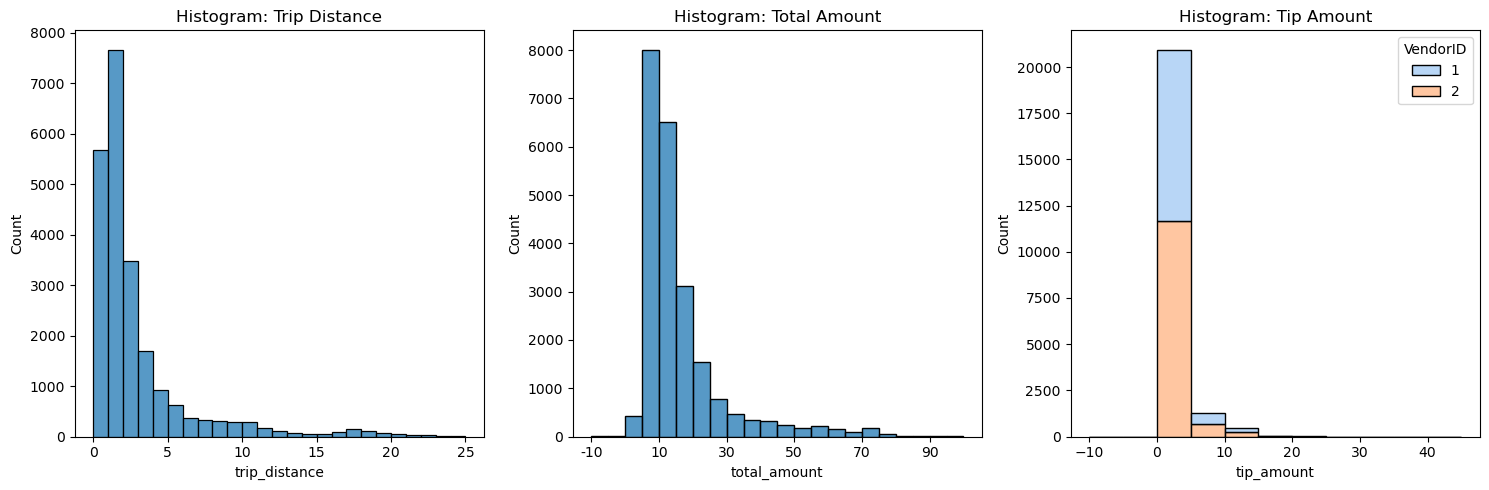

In [9]:
fig,axes=plt.subplots(1,3, figsize=(15,5))
sns.histplot(data=df,x=df['trip_distance'], bins=range(0,26,1), ax=axes[0])
sns.histplot(df['total_amount'], bins=range(-10,101,5), ax=axes[1])
sns.histplot(data=df, x='tip_amount', bins=range(-10,50,5), ax=axes[2], 
             hue='VendorID',
             multiple='stack',
             palette='pastel')
axes[0].set_title('Histogram: Trip Distance')
axes[1].set_title('Histogram: Total Amount')
axes[2].set_title('Histogram: Tip Amount')
axes[1].set_xticks(range(-10,101,20))
axes[1].set_xticklabels(range(-10,101,20))
plt.tight_layout()
plt.show()

**2.2. Tips Amount Investigation**

In [10]:
df.groupby('VendorID')["tip_amount"].sum()

VendorID
1    18506.62
2    23163.78
Name: tip_amount, dtype: float64

**Important Note:**
It seems that tip amount are generally lower than 10$. Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained for all tip amounts.
Next, zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

VendorID types

- 1= Creative Mobile Technologies, LLC; 
- 2= VeriFone Inc.

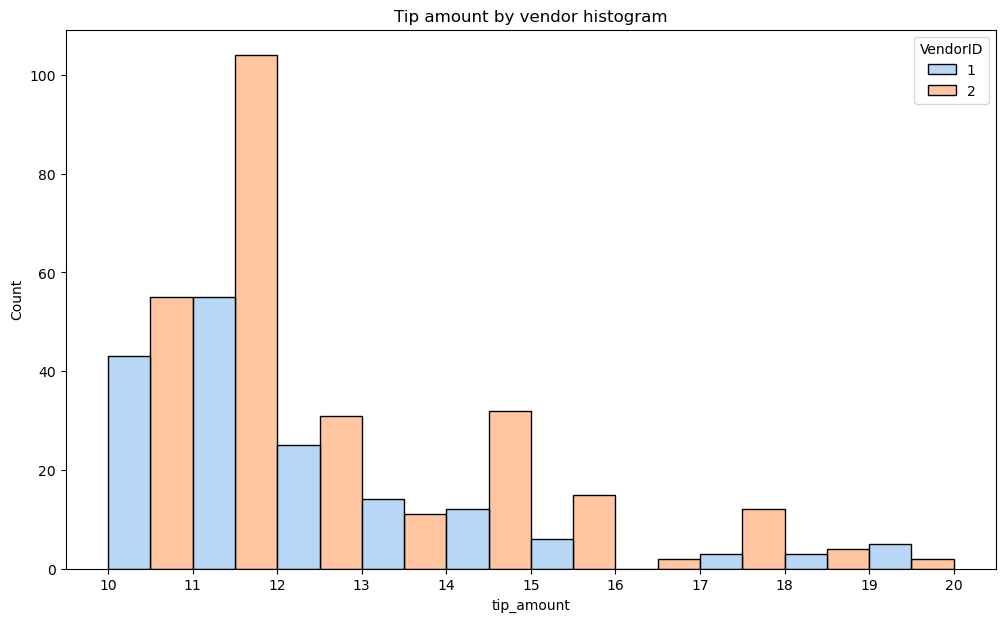

In [11]:
tips_over_10=df[df['tip_amount']>10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_10, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID',
                  multiple='dodge',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram');

**Important note:** The proportions are maintained even at these higher tip amounts, with the exception being at highest extremity, but this is not noteworthy due to the low sample size at these tip amounts.

**Mean tips by passenger count**

Examine the unique values in the `passenger_count` column.

In [12]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

In [13]:
mean_tip_passenger=df.groupby('passenger_count')[['tip_amount']].mean()
mean_tip_passenger[1:]

,tip_amount
passenger_count,
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


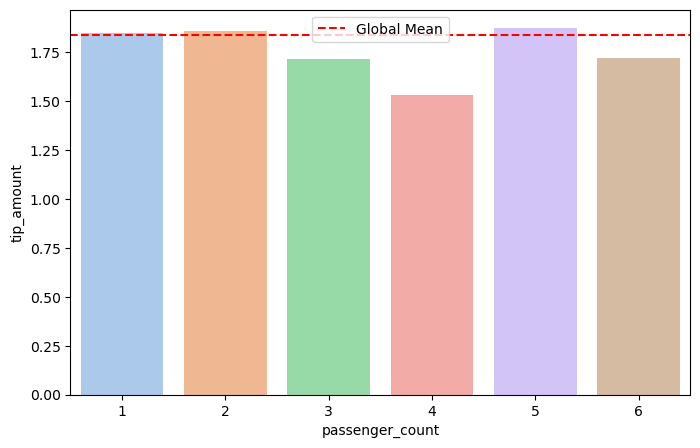

In [14]:
data=mean_tip_passenger[1:]
plt.figure(figsize=(8,5))
ax=sns.barplot(x=data.index,
               y=data['tip_amount'], palette='pastel')
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='Global Mean')
ax.legend()

**Important note:** Mean tip amount varies very little by passenger count. Although it does drop noticeably for four-passenger rides, it's expected that there would be a higher degree of fluctuation because rides with four passengers were the least plentiful in the dataset (aside from rides with zero passengers).

**2.3. Number of Rides**

**Plot total ride count by month**

In [15]:
# Creating two columns: month and day
df['month']=df["tpep_dropoff_datetime"].dt.month_name()
df['day']=df["tpep_dropoff_datetime"].dt.day_name()
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday


In [16]:
monthly_rides=df['month'].value_counts()

In [17]:
# Reordering the results to put the months in calendar order.
month_order = ['January', 
               'February', 
               'March', 
               'April', 
               'May', 
               'June', 
               'July', 
               'August', 
               'September', 
               'October', 
               'November', 
               'December']
monthly_rides=monthly_rides.reindex(index=month_order)

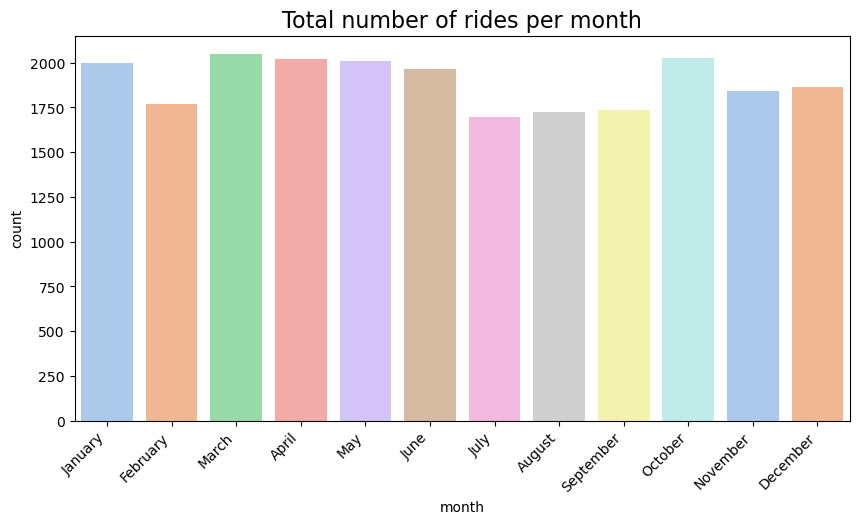

In [18]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=monthly_rides.index, 
               y=monthly_rides, 
               palette='pastel')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title("Total number of rides per month", fontsize=16)
plt.show()

**Important note:** Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.

**Plot total revenue by day of the week**

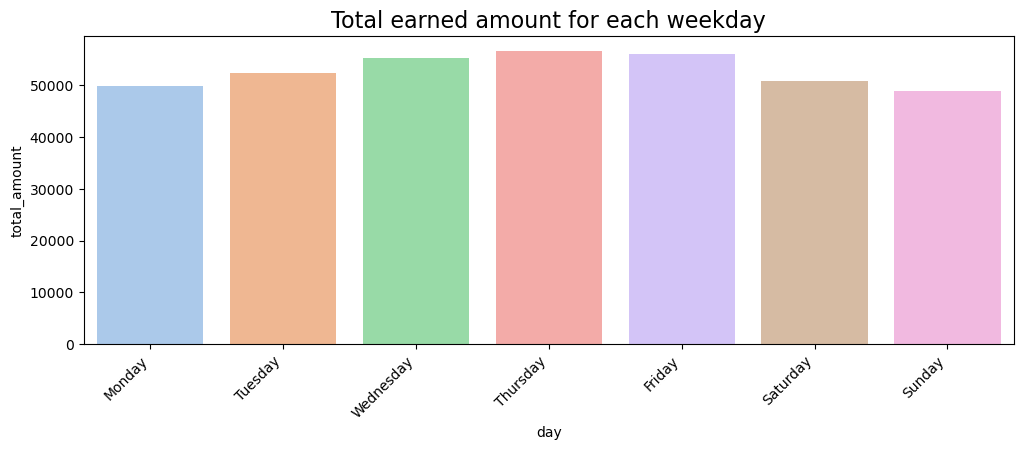

In [19]:
revenue_by_day=df.groupby('day')['total_amount'].sum()
day_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
revenue_by_day=revenue_by_day.reindex(day_order)

plt.figure(figsize=(12,4))
ax=sns.barplot(x=revenue_by_day.index, y=revenue_by_day, palette='pastel')
ax.set_title("Total earned amount for each weekday", fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

**Important note:** Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was ~$6,000 less than Thursday's&mdash;more than a 10% drop.

**Plot total ride count by day**

In [20]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday


In [21]:
daily_ride=df['day'].value_counts()
day_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_ride=daily_ride.reindex(index=day_order)

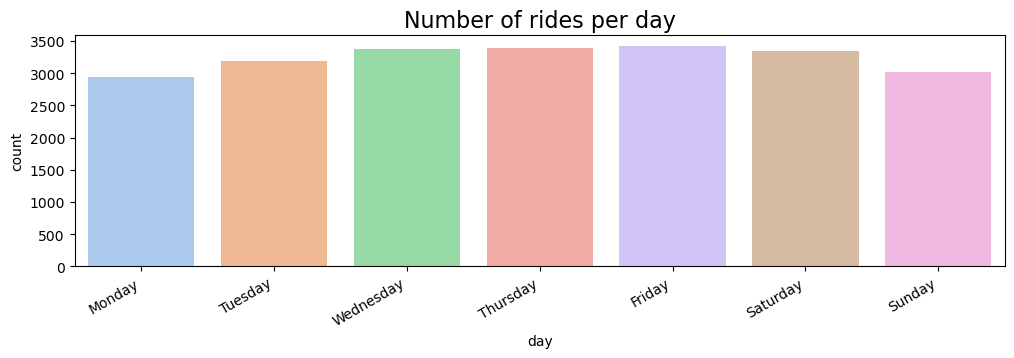

In [22]:
plt.figure(figsize=(12,3))
ax=sns.barplot(x=daily_ride.index, y=daily_ride, palette='pastel')
ax.set_title('Number of rides per day', fontsize=16)
plt.xticks(rotation=30, horizontalalignment='right', fontsize=10)
plt.show()

**Important note:** Suprisingly, Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.

**Plot total revenue by month**

In [23]:
revenue_by_month=df.groupby('month')['total_amount'].sum()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
revenue_by_month=revenue_by_month.reindex(month_order)

**2.4. Total Earned Amount**

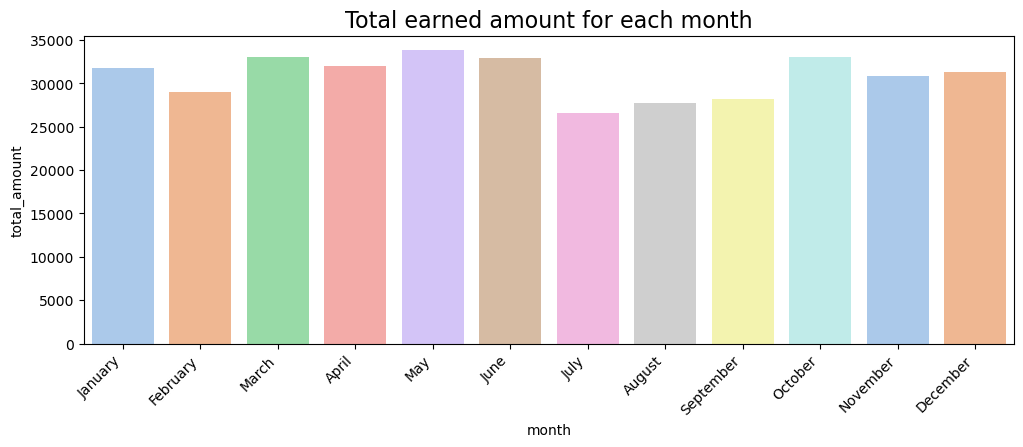

In [24]:
plt.figure(figsize=(12,4))
ax=sns.barplot(x=revenue_by_month.index, y=revenue_by_month, palette='pastel')
ax.set_title("Total earned amount for each month", fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

**Important Note:** Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August, and September, and also one in February.

**Plot mean trip distance by drop-off location**